In [1]:
import numpy as np 
import pandas as pd 
import os
import math
import operator
import matplotlib
import matplotlib.pyplot as plt
from statistics import stdev,mean
import scipy.stats as ss
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
def logistic_regression(data,y,epochs,lrate,threshold):
    #print(y)
        #print(temp)
    theta = np.zeros(data.shape[1])
    theta[0] = 1
    for i in range(epochs):
        z = np.dot(data,theta)
        h = (1 / (1 + np.exp(-z)))
        gradient = np.dot(data.T, (h - y)) / y.size
        theta -= lrate * gradient
    print(theta)
    return theta
        
        
        
    

In [3]:
def predict(inst,theta,threshold,mean,std):
    inst = (inst-mean)/(std)
    inst1 = np.concatenate((np.array([1.0 for i in range(inst.shape[0])])[:, np.newaxis], inst), axis=1)
    inst2 = np.array(inst1,dtype=float)
    #print(theta)
    prob = 1 / (1 + np.exp(-1*np.dot(inst2, theta)))
    #return prob
    #print(prob)
    return list(map(int,prob >= threshold))

In [4]:
admission = pd.read_csv("./AdmissionDataset/data.csv")
#open("./LoanDataset/test1.csv", "w").write("Serial,GREScore,Tscore,Urating,SOP,LOR,CGPA,Research,COA\n" + open("./AdmissionDataset/data.csv").read())


In [5]:
y_adm = admission.Coa.values
X_adm = admission.iloc[:,:].drop('Coa', axis = 1)
X_adm = X_adm.drop('Serial', axis = 1)
X_adm_train,X_adm_val,y_adm_train,y_adm_val=train_test_split(X_adm,y_adm,test_size=0.2,random_state=42)
X_adm_train=X_adm_train.values
X_adm_val=X_adm_val.values

In [6]:
Mean,Std=np.mean((X_adm_train),0),np.std((X_adm_train),0)
X_adm_train=(X_adm_train-Mean)/Std
X_adm_train1 = X_adm_train
X_adm_train = np.concatenate((np.array([1.0 for i in range(X_adm_train.shape[0])])[:, np.newaxis], X_adm_train), axis=1)


In [7]:
value = logistic_regression(X_adm_train,y_adm_train,1000,0.0007,0.75)
Theta = value

[0.99596943 0.05971155 0.05790954 0.04903244 0.04809975 0.0467885
 0.06538722 0.04071113]


### Recall Vs Threshold graph

In [18]:
T = []
Rec = []
t = 0.2
#test k
k = 0
while t < 0.95:
#     k++
    T.append(t)
    #print(k)
    T_class = list(map(int,y_adm_val >= t ))
    k = 0
#     k++
    out = predict(X_adm_val,Theta,t,Mean,Std)
    k = 1
#     print(k)
    Rec.append(recall_score(T_class,out, average = 'micro'))
    t += 0.1
plt.figure()
plt.plot(T, Rec, 'b')
plt.xlabel('Threshold_Value')
plt.ylabel('Recall_value')
plt.show()

AttributeError: 'module' object has no attribute 'to_rgba'

In [19]:
def confusionMatrix(t):
    T_class = list(map(int,y_adm_val >= t ))
    out = predict(X_adm_val,Theta,t,Mean,Std)
    cm = confusion_matrix(T_class,out)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0'])
    print("F1-score",f1_score(T_class,out, average = 'micro'))
    print("precision",precision_score(T_class,out, average = 'micro'))
    print("Accuracy",accuracy_score(T_class,out))
    print("Recall",recall_score(T_class,out, average = 'micro'))

    
    



In [20]:
confusionMatrix(0.7)

('F1-score', 0.8777777777777779)
('precision', 0.8777777777777778)
('Accuracy', 0.8777777777777778)
('Recall', 0.8777777777777778)


AttributeError: 'module' object has no attribute 'to_rgba'

F1-score 0.8888888888888888
precision 0.8888888888888888
Accuracy 0.8888888888888888
Recall 0.8888888888888888


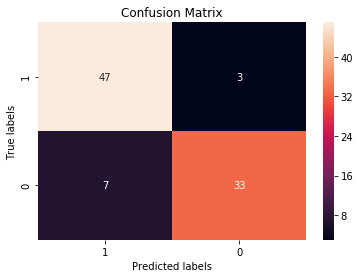

In [18]:
confusionMatrix(0.75)

F1-score 0.8222222222222222
precision 0.8222222222222222
Accuracy 0.8222222222222222
Recall 0.8222222222222222


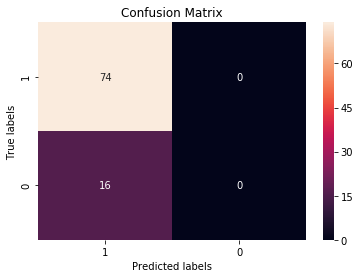

In [19]:
confusionMatrix(0.85)

### Distribution of the classes for different thresholds

In [192]:
j = 0.2
while j <= 0.9:
    d1 = admission[admission['Coa'] >= j]
    print(j , "  " ,d1.shape[0],admission.shape[0] - d1.shape[0])
    j+=0.05

0.2    450 0
0.25    450 0
0.3    450 0
0.35    448 2
0.39999999999999997    444 6
0.44999999999999996    436 14
0.49999999999999994    415 35
0.5499999999999999    392 58
0.6    364 86
0.65    317 133
0.7000000000000001    259 191
0.7500000000000001    189 261
0.8000000000000002    126 324
0.8500000000000002    93 357


In [20]:
T_class = list(map(int,y_adm_val >= 0.75))

In [21]:
out = predict(X_adm_val,Theta,0.75,Mean,Std)

In [22]:
print("F1-score",f1_score(T_class,out, average = 'micro'))
print("precision",precision_score(T_class,out, average = 'micro'))
print("Accuracy",accuracy_score(T_class,out))
print("Recall",recall_score(T_class,out, average = 'micro'))
    

F1-score 0.8888888888888888
precision 0.8888888888888888
Accuracy 0.8888888888888888
Recall 0.8888888888888888


### Part-2 (KNN vs logistic regression)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
Train_class = list(map(int,y_adm_train >= 0.75))
#print(Train_class)

In [37]:
neigh = KNeighborsClassifier(n_neighbors=30)

In [38]:
neigh.fit(X_adm_train1, Train_class)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [41]:
Pred_Class = neigh.predict(X_adm_val)

In [42]:
print("F1-score",f1_score(T_class,Pred_Class, average = 'micro'))
print("precision",precision_score(T_class,Pred_Class, average = 'micro'))
print("Accuracy",accuracy_score(T_class,Pred_Class))
print("Recall",recall_score(T_class,Pred_Class, average = 'micro'))

F1-score 0.4444444444444444
precision 0.4444444444444444
Accuracy 0.4444444444444444
Recall 0.4444444444444444
